In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing,Polygon

# is_in_region(point, bot left grid, top left grid, top right grid, bot right grid )
def is_in_region(x, y, a1, a2, b1, b2, c1, c2, d1, d2):
    point = Point(x,y)
    polygon = Polygon([(a1,a2), (b1,b2), (c1,c2), (d1,d2)])
    return polygon.contains(point)

### Data I/O

### R<sub>ini</sub> > 5, R<sub>final</sub> > 5.

### R<sub>ini</sub> > 5.

In [3]:
# later time step
nn = 300
# step interval
dn = 10

file_ini=('./data/ptcls_info_t%3.3d.dat')%(nn)
x1,y1,vx1,vy1,vz1,m1,pe1=np.loadtxt(file_ini,usecols=[0,1,2,3,4,5,6],unpack=True)
file_final=('./data/ptcls_info_t%3.3d.dat')%(nn+dn)
x2,y2,vx2,vy2,vz2,m2,pe2=np.loadtxt(file_final,usecols=[0,1,2,3,4,5,6],unpack=True)
datname=('./output/run5018_EJ_spiral0_t%3.3d_t%3.3d.dat')%(nn, nn+dn)
output=open(datname, "w")

omega_bar = 0.542
omega_spiral = 0.228

CR_bar = 3.2
CR_spiral = 7.0
Sep = 5.5

R_max = 8.

#rotate x2
#phase = np.pi * (80.) / 180.
#x2 = [x0[i]*np.cos(phase) - y0[i]*np.sin(phase) for i in range(len(x0))]
#y2 = [x0[i]*np.sin(phase) + y0[i]*np.cos(phase) for i in range(len(x0))]
#vx2 = [vx0[i]*np.cos(phase) - vy0[i]*np.sin(phase) for i in range(len(vx0))]
#vy2 = [vx0[i]*np.sin(phase) + vy0[i]*np.cos(phase) for i in range(len(vx0))]

#r1, r2, ang1, ang2, Ej1, Ej2
for i in range(len(x1)):
    r1 = np.sqrt(x1[i]**2 + y1[i]**2)
    r2 = np.sqrt(x2[i]**2 + y2[i]**2)
    if (r1 > Sep and r1 < R_max):
        ang1 = x1[i]*vy1[i]-y1[i]*vx1[i]
        ang2 = x2[i]*vy2[i]-y2[i]*vx2[i]
        te1 = 0.5 * (vx1[i]**2 + vy1[i]**2 + vz1[i]**2) + pe1[i]
        te2 = 0.5 * (vx2[i]**2 + vy2[i]**2 + vz2[i]**2) + pe2[i]
        dr = r2 - r1
        da = ang2 - ang1
        Ej1 = pe1[i]+0.5*(vx1[i]**2+vy1[i]**2+vz1[i]**2)+omega_spiral*(vx1[i]*y1[i]-vy1[i]*x1[i])-0.5*omega_spiral**2*r1**2
        Ej2 = pe2[i]+0.5*(vx2[i]**2+vy2[i]**2+vz2[i]**2)+omega_spiral*(vx2[i]*y2[i]-vy2[i]*x2[i])-0.5*omega_spiral**2*r2**2
        dEj = Ej2 - Ej1
        output.writelines('%4.3f\t%4.3f\t%4.3f\t%4.3f\t%4.3f\t%4.3f\n'%(x1[i],y1[i],ang1,da,Ej1,dEj))

### Read in EJ file

In [3]:
# later time step
nn = 370
# step interval
dn = 10

filename=('./output/run5018_EJ_spiral0_t%3.3d_t%3.3d.dat')%(nn, nn+dn)
x,y,ang,da,Ej,dEj = np.loadtxt(filename,usecols=[0,1,2,3,4,5],unpack=True)

omega_bar = 0.542
omega_spiral = 0.228

CR_bar = 3.2
CR_spiral = 7.0
Sep = 5.0

R_max = 8.

xmin = 2
xmax = 7
ymin = -1.5
ymax = 1.5

### 1. plot E<sub>J</sub> - &Delta;E<sub>J</sub>, and dissect it into different regions

### L<sub>Z</sub> in the bar frame

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


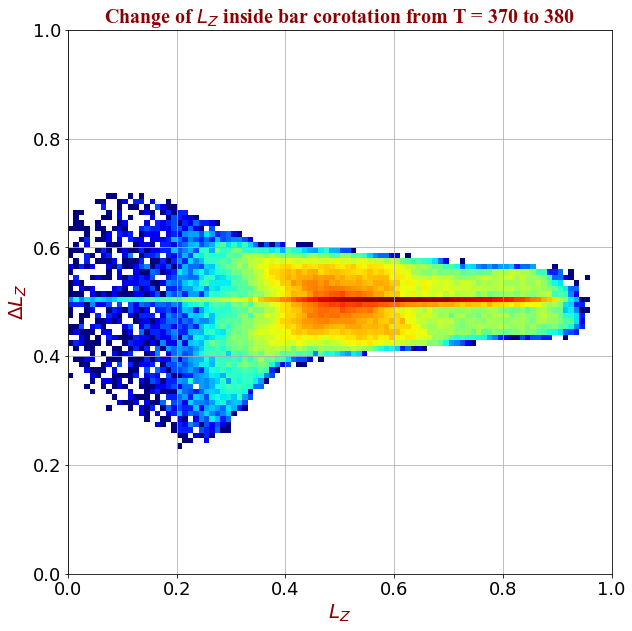

In [4]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da,ang,bins=(100,100),range=([ymin, ymax],[xmin, xmax]))
X,Y = np.meshgrid(xedges,yedges)

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot grid
plt.grid(True)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#title
titleStr='Change of $L_{Z}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/da_spiral0_t'+str(nn)+'_to_'+str(nn+dn)+'_color.png'
plt.savefig(figname1)

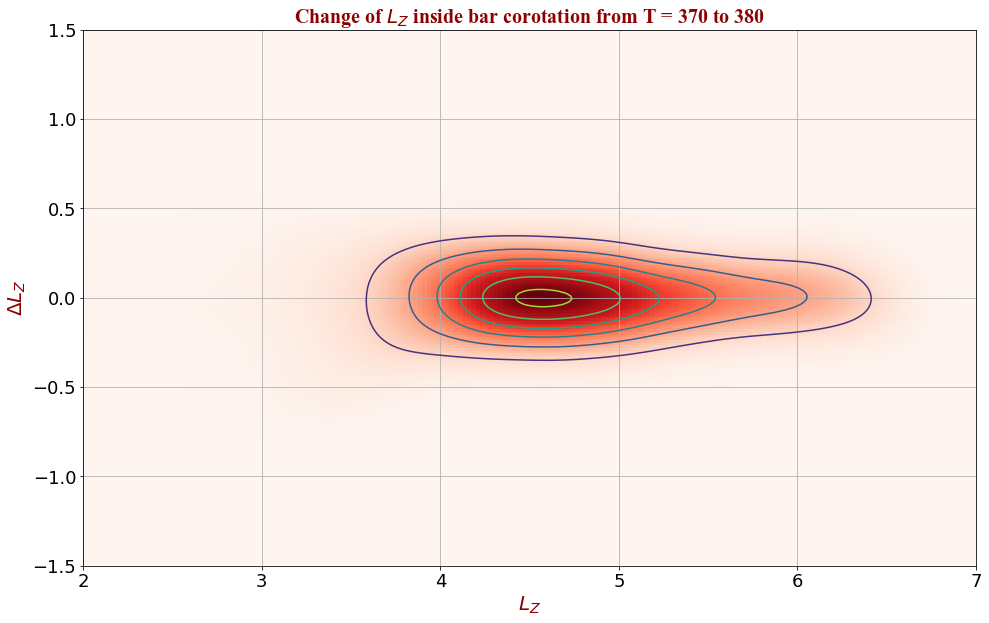

<Figure size 432x288 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

xy = np.vstack([ang, da])

d = xy.shape[0]
n = xy.shape[1]
bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
#bw = n**(-1./(d + 4)) # scott

#cmap
cmap=plt.cm.get_cmap('Reds')

kde = KernelDensity(bandwidth=bw, metric='euclidean', kernel='gaussian', algorithm='ball_tree')

kde.fit(xy.T)

xmin = 2
xmax = 7
ymin = -1.5
ymax = 1.5

X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])

Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

ax.imshow(np.rot90(Z), cmap = cmap, extent=[xmin, xmax, ymin, ymax])

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# plot grids
plt.grid(True)

# contour
ax.contour(X, Y, Z)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#title
titleStr='Change of $L_{Z}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

# plot grids
plt.grid(True)

# ax.scatter(Ej, dEj/Ej, c='k', s=5, edgecolor='')
#plt.colorbar(ax.imshow(np.rot90(Z), cmap = cmap, extent=[xmin, xmax, ymin, ymax]))
plt.show()
#savefig
figname2='./output/da_spiral0_t'+str(nn)+'_to_'+str(nn+dn)+'_kde.png'
plt.savefig(figname2)

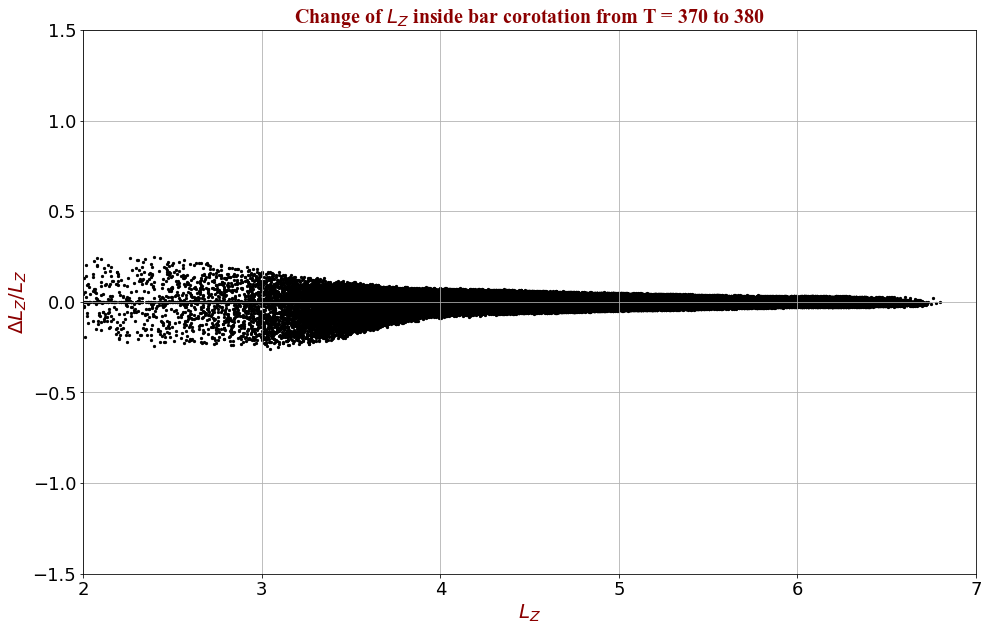

In [6]:
# test results
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

xmin = 2
xmax = 7
ymin = -1.5
ymax = 1.5

plt.scatter(ang, da/ang, c='k', s=5)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# plot grids
plt.grid(True)

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}/L_{Z}$',fontdict=font)

#title
titleStr='Change of $L_{Z}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

plt.show()

KeyboardInterrupt: 

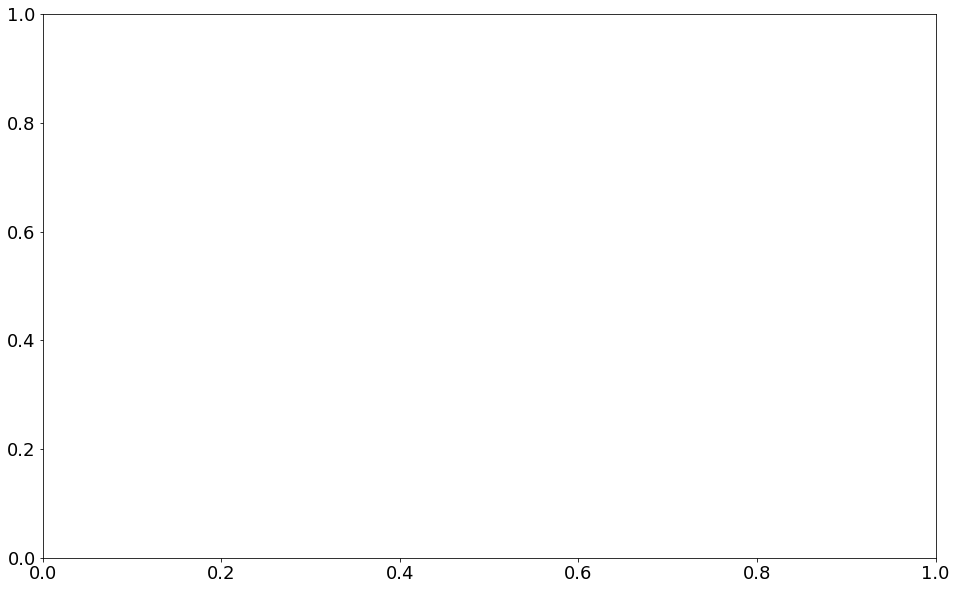

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

xy = np.vstack([ang, da/ang])

d = xy.shape[0]
n = xy.shape[1]
bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
#bw = n**(-1./(d + 4)) # scott

#cmap
cmap=plt.cm.get_cmap('Reds')

kde = KernelDensity(bandwidth=bw, metric='euclidean', kernel='gaussian', algorithm='ball_tree')

kde.fit(xy.T)

xmin = 2
xmax = 7
ymin = -1.5
ymax = 1.5

X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])

Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

ax.imshow(np.rot90(Z), cmap = cmap, extent=[xmin, xmax, ymin, ymax])

# contour
ax.contour(X, Y, Z)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}/L_{Z}$',fontdict=font)

#title
titleStr='Change of $L_{Z}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

# plot grids
plt.grid(True)

# ax.scatter(Ej, dEj/Ej, c='k', s=5, edgecolor='')
#plt.colorbar(ax.imshow(np.rot90(Z), cmap = cmap, extent=[xmin, xmax, ymin, ymax]))
plt.show()

#savefig
figname3='./output/da_ang_spiral0_t'+str(nn)+'_to_'+str(nn+dn)+'_kde.png'
plt.savefig(figname3)